In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv("Medical_Advice.csv")

In [16]:
data.head(10)

,age,gender,bp,temp,symptom,target_disease,suggestion,tablet
0,56,M,124,98.5,diabetes,diabetes,"Take insulin/medicines regularly, eat balanced...",Glimepiride 2mg
1,69,F,108,99.0,hypertension,hypertension,"Reduce salt intake, exercise regularly, take m...",Lisinopril 10mg
2,46,F,143,99.5,fever,fever,"Take paracetamol, stay hydrated, consult docto...",Ibuprofen 200mg
3,32,F,121,98.9,fever,fever,"Take paracetamol, stay hydrated, consult docto...",Ibuprofen 200mg
4,60,M,137,97.9,chest_pain,chest_pain,"Consult doctor immediately, regular medicines,...",Nitroglycerin 0.3mg
5,25,M,121,98.9,body_pain,body_pain,"Do light stretching, warm bath, pain relief me...",Aceclofenac 100mg
6,38,F,150,100.2,body_pain,body_pain,"Do light stretching, warm bath, pain relief me...",Paracetamol 500mg
7,56,F,146,97.1,headache,headache,"Take rest, drink water, avoid screen time, mil...",Paracetamol 500mg
8,36,M,116,98.8,fever,fever,"Take paracetamol, stay hydrated, consult docto...",Ibuprofen 200mg
9,40,F,134,97.5,diabetes,diabetes,"Take insulin/medicines regularly, eat balanced...",Insulin 10 units


In [17]:
data.isnull().sum()

age               0
gender            0
bp                0
temp              0
symptom           0
target_disease    0
suggestion        0
tablet            0
dtype: int64

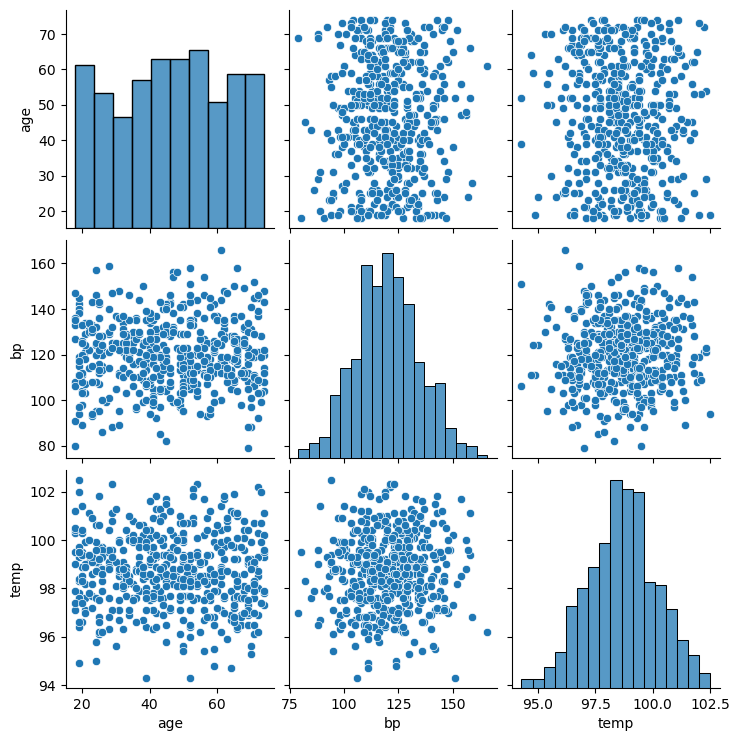

In [18]:
sns.pairplot(data)

In [19]:
data.columns

Index(['age', 'gender', 'bp', 'temp', 'symptom', 'target_disease',
       'suggestion', 'tablet'],
      dtype='object')

Text(0.5, 1.0, 'target_disease frequency')

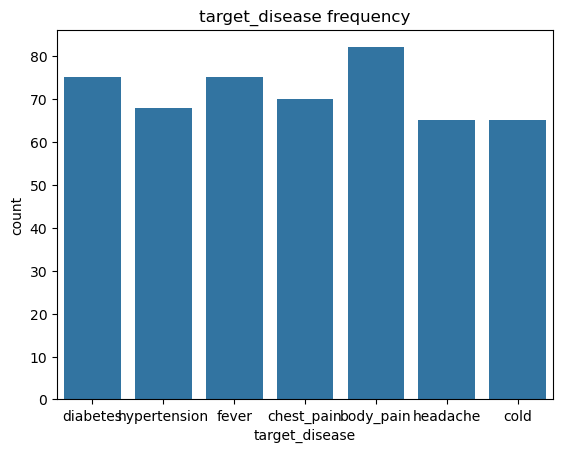

In [20]:
sns.countplot(x="target_disease",data=data)
plt.title("target_disease frequency")

Text(0.5, 0.98, 'distrubution in age,temp,bp')

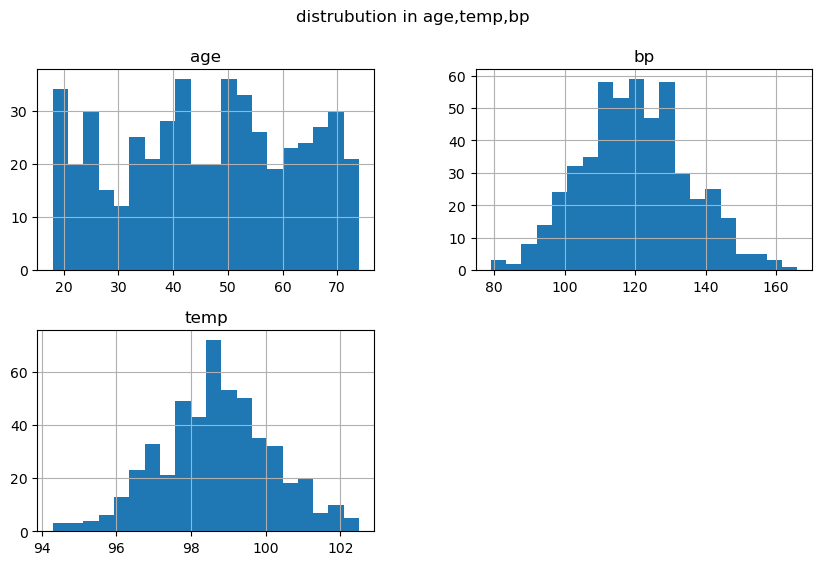

In [21]:
data[["age","bp","temp"]].hist(figsize=(10,6), bins=20)
plt.suptitle("distrubution in age,temp,bp")

Text(0.5, 1.0, 'check the outliers')

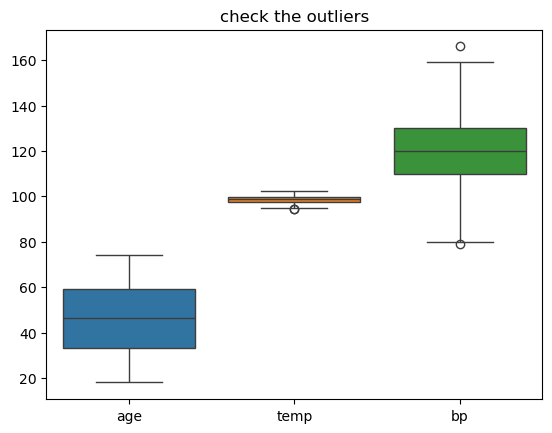

In [22]:
sns.boxplot(data=data[['age','temp','bp']])
plt.title("check the outliers")

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix

In [24]:
le_symptom=LabelEncoder()
le_gender=LabelEncoder()
le_dieses=LabelEncoder()

In [33]:
data["symptom_en"]=le_symptom.fit_transform(data["symptom"])
data["geneder_en"]=le_gender.fit_transform(data["gender"])
data["dieseas_en"]=le_dieses.fit_transform(data["target_disease"])

In [26]:
data.head(10)

,age,gender,bp,temp,symptom,target_disease,suggestion,tablet
0,56,M,124,98.5,diabetes,diabetes,"Take insulin/medicines regularly, eat balanced...",Glimepiride 2mg
1,69,F,108,99.0,hypertension,hypertension,"Reduce salt intake, exercise regularly, take m...",Lisinopril 10mg
2,46,F,143,99.5,fever,fever,"Take paracetamol, stay hydrated, consult docto...",Ibuprofen 200mg
3,32,F,121,98.9,fever,fever,"Take paracetamol, stay hydrated, consult docto...",Ibuprofen 200mg
4,60,M,137,97.9,chest_pain,chest_pain,"Consult doctor immediately, regular medicines,...",Nitroglycerin 0.3mg
5,25,M,121,98.9,body_pain,body_pain,"Do light stretching, warm bath, pain relief me...",Aceclofenac 100mg
6,38,F,150,100.2,body_pain,body_pain,"Do light stretching, warm bath, pain relief me...",Paracetamol 500mg
7,56,F,146,97.1,headache,headache,"Take rest, drink water, avoid screen time, mil...",Paracetamol 500mg
8,36,M,116,98.8,fever,fever,"Take paracetamol, stay hydrated, consult docto...",Ibuprofen 200mg
9,40,F,134,97.5,diabetes,diabetes,"Take insulin/medicines regularly, eat balanced...",Insulin 10 units


In [34]:
X = data[["age", "geneder_en", "bp", "temp", "symptom_en"]]
y = data["dieseas_en"]


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
model1=DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

y_pred=model1.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 1.0


In [38]:
model2=RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train,y_train)
y_pred_2=model2.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 1.0


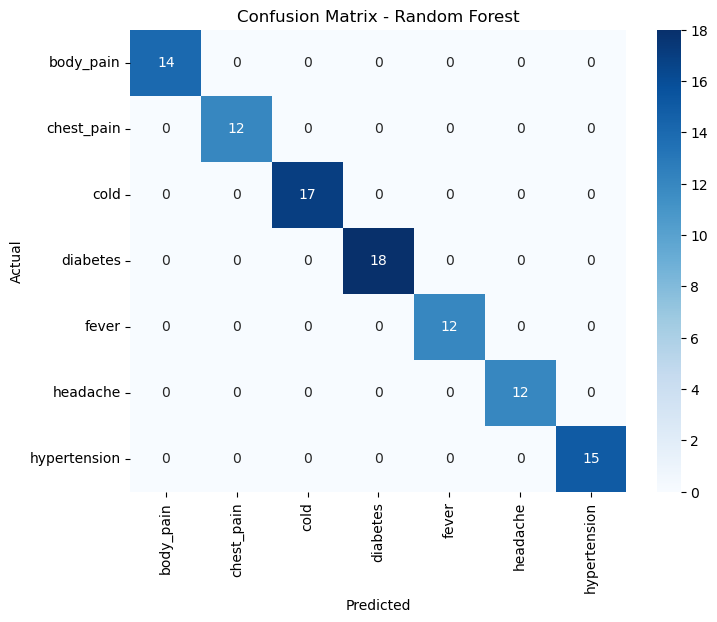

In [39]:
cm = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_dieses.classes_,
            yticklabels=le_dieses.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [41]:
def predict_Disease(age, gender, bp, temp, symptom):
   
    gender_enc = le_gender.transform([gender])[0]
    symptom_enc = le_symptom.transform([symptom])[0]

    
    input_data = [[age, gender_enc, bp, temp, symptom_enc]]


    prediction = model2.predict(input_data)[0]
    disease = le_dieses.inverse_transform([prediction])[0]

    
    row = data[data["target_disease"] == disease].iloc[0]
    suggestion = row["suggestion"]
    tablet = row["tablet"]

    return {
        "Disease": disease,
        "Suggestion": suggestion,
        "Tablet": tablet
    }

sample = predict_Disease(22, "M", 135, 101.5, "cold")
print("\nSample Prediction:", sample)



Sample Prediction: {'Disease': 'cold', 'Suggestion': 'Drink warm fluids, rest, take paracetamol if needed', 'Tablet': 'Azithromycin 250mg'}


D:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
import joblib

In [43]:
joblib.dump(model2,"model.pkl")

['model.pkl']

In [47]:
joblib.dump(le_gender, "le_gender.pkl")
joblib.dump(le_symptom, "le_symptom.pkl")
joblib.dump(le_dieses, "le_disease.pkl")

['le_disease.pkl']

In [45]:
data.columns

Index(['age', 'gender', 'bp', 'temp', 'symptom', 'target_disease',
       'suggestion', 'tablet', 'symptom_en', 'geneder_en', 'dieseas_en'],
      dtype='object')